n=4044 pairs
Height: 6, Aspect: 1.33


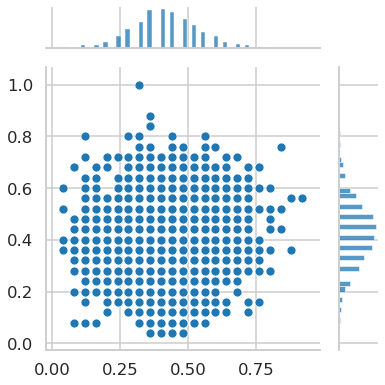

Height: 6, Aspect: 1.33


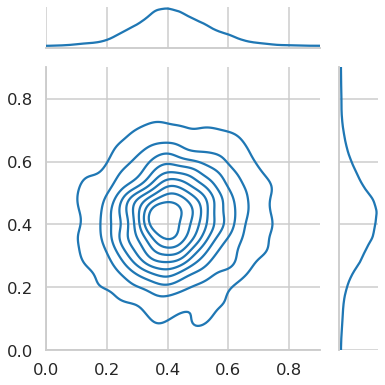

In [5]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'correlation_syn_diameter_dual_201230'


sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

from weight_database import WeightDatabase
weightdb = WeightDatabase()

def weight_fn(syn):
    z_len = syn['z_length'] - 40
    major_axis_length = syn['major_axis_length'] * .9
    diameter = max(z_len, major_axis_length)
    diameter = int(diameter/40+.5)
    diameter *= 40
    return diameter
    # r = diameter/2
    # area = math.pi*r*r
    # return area

gzdb = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_201224_setup01_syndb_threshold_10_coalesced.gz'
weightdb.load_syn_db(gzdb,
    weight_fn=weight_fn)

mpd = MyPlotData()
mpd_raw = MyPlotData()
hist = defaultdict(int)
weights_db = weightdb.get_weights()

n_pairs = 0
array_w1 = []
array_w2 = []
for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        if len(weights) != 2:
            continue
        w1, w2 = weights
        w1 /= 1000
        w2 /= 1000
        array_w1.append(w1)
        array_w2.append(w2)
        mpd_raw.add_data_point(
            w1=w1,
            w2=w2,
            )
        n_pairs += 1
        
print(f'n={n_pairs} pairs')

importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw,
    x="w1",
    y="w2",
    # y_axis_label='Distance from PCL (um)',
    # x_axis_label='X offset from soma (um)',
    # xlim=[-200, 200],
    # kind=f'{kind}',
    kind='scatter',
    save_filename=f'{script_n}.svg',
    show=True,
    )


importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw,
    x="w1",
    y="w2",
    ylim=[None, .9],
    xlim=[None, .9],
    # y_axis_label='Distance from PCL (um)',
    # x_axis_label='X offset from soma (um)',
    # xlim=[-200, 200],
    # kind=f'{kind}',
    kind='kde',
    save_filename=f'{script_n}_kde.svg',
    show=True,
    )





In [3]:
import scipy.stats

scipy.stats.spearmanr(array_w1, array_w2)

#array_w1

SpearmanrResult(correlation=0.07876821284439017, pvalue=5.294833582036103e-07)

In [4]:
import scipy.stats

scipy.stats.pearsonr(array_w1, array_w2)

#array_w1

(0.07145469665082439, 5.405809161099373e-06)

In [11]:
# EM of a single pf with 2 synapses to a single PC, showing a pair of small and a big synapses
hist = []

n_pairs = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        if len(weights) != 2:
            continue
        w1, w2 = weights
        w1 /= 1000
        w2 /= 1000
        hist.append((w1, w2, neuron, pc))

hist.sort(key=lambda x: (x[0], x[1]))
for e in hist: print(e)

(0.04, 0.36, 'pf_191', 'purkinje_1')
(0.04, 0.4, 'pf_10', 'pc_28')
(0.04, 0.52, 'pf_2821', 'purkinje_0')
(0.04, 0.52, 'pf_367', 'pc_118')
(0.04, 0.6, 'pf_3367', 'pc_9')
(0.08, 0.08, 'pf_1869', 'pc_19')
(0.08, 0.2, 'pf_65', 'pc_118')
(0.08, 0.28, 'pf_868', 'pc_28')
(0.08, 0.32, 'pf_4071', 'pc_114')
(0.08, 0.36, 'pf_2787', 'pc_18')
(0.08, 0.36, 'pf_3275', 'pc_117')
(0.08, 0.36, 'pf_517', 'purkinje_0')
(0.08, 0.4, 'pf_1444', 'pc_28')
(0.08, 0.44, 'pf_3138', 'pc_19')
(0.08, 0.48, 'pf_2685', 'purkinje_0')
(0.08, 0.48, 'pf_4279', 'pc_50')
(0.08, 0.68, 'pf_3309', 'pc_9')
(0.08, 0.68, 'pf_3509', 'pc_32')
(0.12, 0.08, 'pf_456', 'pc_32')
(0.12, 0.16, 'pf_3700', 'pc_32')
(0.12, 0.2, 'pf_3291', 'pc_49')
(0.12, 0.24, 'pf_1905', 'pc_50')
(0.12, 0.28, 'pf_1021', 'pc_19')
(0.12, 0.28, 'pf_1224', 'pc_4')
(0.12, 0.28, 'pf_2771', 'pc_15')
(0.12, 0.32, 'pf_2680', 'purkinje_0')
(0.12, 0.32, 'pf_3161', 'pc_17')
(0.12, 0.32, 'pf_771', 'pc_32')
(0.12, 0.36, 'pf_3795', 'pc_53')
(0.12, 0.36, 'pf_4137', 'pc_50')

In [62]:
import compress_pickle
rawdb = compress_pickle.load(gzdb)

sid = 'pf_4495'
syns = rawdb[sid]
# print(syns)
print(sid)
for pc in syns:
    pc_syns = syns[pc]
    print(pc)
    for syn in pc_syns:
        print(syn)
    print()
#     print(f'{pc}: {syns[pc]}\n')

pf_4495
pc_3
{'syn_loc': (132696, 89788, 390), 'syn_loc0': (530784, 359152, 15600), 'sf_pre': 11795592642621, 'sf_post': 11427410083960, 'pre_loc': (530864, 358944, 15600), 'post_loc': (530704, 359360, 15600), 'score': 3075.10986328125, 'area': 3501, 'z_length': 880, 'major_axis_length': 493}
{'syn_loc': (132380, 89532, 439), 'syn_loc0': (529520, 358128, 17560), 'sf_pre': 11795592642621, 'sf_post': 11210442014877, 'pre_loc': (529632, 358208, 17560), 'post_loc': (529408, 358048, 17560), 'score': 2163.39990234375, 'area': 2498, 'z_length': 480, 'major_axis_length': 498}

pc_21
{'syn_loc': (132376, 89636, 555), 'syn_loc0': (529504, 358544, 22200), 'sf_pre': 12632914003293, 'sf_post': 12555207968531, 'pre_loc': (529408, 358736, 22200), 'post_loc': (529600, 358352, 22200), 'score': 3326.400146484375, 'area': 3795, 'z_length': 840, 'major_axis_length': 588}
{'syn_loc': (132100, 89872, 702), 'syn_loc0': (528400, 359488, 28080), 'sf_pre': 13754676675346, 'sf_post': 13672434237470, 'pre_loc': (

In [23]:
# EM of a single pf with 2 synapses to a single PC, showing a pair of small and a big synapses
hist = []

n_pairs = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        if len(weights) < 5:
            continue
        hist.append((neuron, pc))

for e in hist: print(e)

('pf_1003', 'purkinje_1')
('pf_1065', 'purkinje_1')
('pf_1071', 'pc_28')
('pf_1212', 'pc_15')
('pf_1214', 'pc_4')
('pf_1240', 'pc_4')
('pf_2111', 'purkinje_1')
('pf_2118', 'purkinje_1')
('pf_2448', 'pc_1')
('pf_2508', 'purkinje_0')
('pf_2659', 'pc_5')
('pf_2659', 'purkinje_0')
('pf_2663', 'purkinje_0')
('pf_2810', 'pc_7')
('pf_295', 'pc_15')
('pf_2955', 'pc_5')
('pf_3016', 'purkinje_1')
('pf_308', 'pc_4')
('pf_308', 'pc_9')
('pf_3174', 'pc_15')
('pf_3374', 'pc_9')
('pf_3673', 'pc_19')
('pf_3684', 'pc_19')
('pf_3686', 'pc_19')
('pf_3795', 'pc_3')
('pf_3994', 'pc_18')
('pf_4310', 'pc_20')
('pf_4351', 'pc_21')
('pf_4452', 'pc_21')
('pf_4482', 'pc_21')
('pf_707', 'pc_16')
('pf_866', 'pc_9')


In [61]:
import compress_pickle
rawdb = compress_pickle.load(gzdb)

sid = 'pf_1511'
syns = rawdb[sid]
# print(syns)
print(sid)
for pc in syns:
    pc_syns = syns[pc]
    print(pc)
    for syn in pc_syns:
        print(syn)
    print()
#     print(f'{pc}: {syns[pc]}\n')

pf_1511
pc_9
{'syn_loc': (117336, 58216, 336), 'syn_loc0': (469344, 232864, 13440), 'sf_pre': 5813216215056, 'sf_post': 5539012936394, 'pre_loc': (469312, 233024, 13440), 'post_loc': (469376, 232704, 13440), 'score': 687.1058349609375, 'area': 815, 'z_length': 320, 'major_axis_length': 340}
{'syn_loc': (117324, 58364, 337), 'syn_loc0': (469296, 233456, 13480), 'sf_pre': 5813216215056, 'sf_post': 5539012936394, 'pre_loc': (469232, 233264, 13480), 'post_loc': (469360, 233648, 13480), 'score': 2896.63916015625, 'area': 3262, 'z_length': 640, 'major_axis_length': 541}
{'syn_loc': (117200, 58232, 338), 'syn_loc0': (468800, 232928, 13520), 'sf_pre': 5813216215056, 'sf_post': 5539012936394, 'pre_loc': (468912, 233072, 13520), 'post_loc': (468688, 232784, 13520), 'score': 1106.584228515625, 'area': 1275, 'z_length': 360, 'major_axis_length': 344}

pc_49
{'syn_loc': (117020, 60744, 782), 'syn_loc0': (468080, 242976, 31280), 'sf_pre': 8338334024791, 'sf_post': 8397511066124, 'pre_loc': (468240, 

In [60]:
#
hist = []

n_pairs = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        if len(weights) < 3:
            continue
        syns = rawdb[neuron]
        pc_syns = syns[pc]
        min_z, max_z = (9999, 0)
        for s in pc_syns:
#             print(s)
            min_z = min(min_z, s['syn_loc'][2])
            max_z = max(max_z, s['syn_loc'][2])
#         print((min_z, max_z)); asdf
        if max_z - min_z < 10:
#             print((min_z, max_z)); asdf
            hist.append((neuron, pc))

for e in hist: print(e)

('pf_1018', 'pc_dendrite_fragment_11')
('pf_1166', 'pc_5')
('pf_1189', 'purkinje_0')
('pf_1314', 'pc_15')
('pf_1511', 'pc_9')
('pf_1735', 'pc_9')
('pf_1761', 'pc_16')
('pf_1763', 'pc_9')
('pf_2067', 'pc_9')
('pf_2268', 'pc_32')
('pf_2309', 'pc_32')
('pf_2448', 'pc_dendrite_7')
('pf_2615', 'pc_32')
('pf_2772', 'purkinje_0')
('pf_2897', 'pc_28')
('pf_3730', 'pc_21')
('pf_3780', 'pc_48')
('pf_391', 'pc_15')
('pf_3976', 'pc_26')
('pf_462', 'pc_4')
('pf_565', 'purkinje_0')
('pf_678', 'pc_7')
('pf_891', 'pc_28')


In [76]:
# finding a big synapse
hist = []

n_pairs = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    syns = rawdb[neuron]
    for pc, weights in pc_weights.items():
        for w in weights:
            if w < .5:
                continue
        pc_syns = syns[pc]
        for s in pc_syns:
            if s['major_axis_length'] > 870:
                print(s)


{'syn_loc': (126572, 82220, 184), 'syn_loc0': (506288, 328880, 7360), 'sf_pre': 8454586369411, 'sf_post': 8395142596349, 'pre_loc': (506080, 328896, 7360), 'post_loc': (506496, 328864, 7360), 'score': 3347.294189453125, 'area': 3814, 'z_length': 520, 'major_axis_length': 871}
{'syn_loc': (109084, 45684, 878), 'syn_loc0': (436336, 182736, 35120), 'sf_pre': 6439727267915, 'sf_post': 6439727268300, 'pre_loc': (436464, 182592, 35120), 'post_loc': (436208, 182880, 35120), 'score': 3482.90966796875, 'area': 3905, 'z_length': 600, 'major_axis_length': 877}
{'syn_loc': (102552, 75564, 128), 'syn_loc0': (410208, 302256, 5120), 'sf_pre': 4935980810985, 'sf_post': 5104384737369, 'pre_loc': (410416, 302144, 5120), 'post_loc': (410000, 302368, 5120), 'score': 2090.18408203125, 'area': 2314, 'z_length': 280, 'major_axis_length': 872}
{'syn_loc': (103136, 74320, 256), 'syn_loc0': (412544, 297280, 10240), 'sf_pre': 5541937808343, 'sf_post': 5586807030556, 'pre_loc': (412384, 297392, 10240), 'post_loc'

In [79]:
# finding a small synapse
hist = []

n_pairs = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    syns = rawdb[neuron]
    for pc, weights in pc_weights.items():
        for w in weights:
            if w > .5:
                continue
        pc_syns = syns[pc]
        for s in pc_syns:
            if s['major_axis_length'] > 50 and s['major_axis_length'] < 100:
                print(s)


{'syn_loc': (100828, 51008, 678), 'syn_loc0': (403312, 204032, 27120), 'sf_pre': 5233634836661, 'sf_post': 5190251315218, 'pre_loc': (403168, 204064, 27120), 'post_loc': (403456, 204000, 27120), 'score': 40.20784378051758, 'area': 57, 'z_length': 80, 'major_axis_length': 55}
{'syn_loc': (107128, 91392, 841), 'syn_loc0': (428512, 365568, 33640), 'sf_pre': 11003545518361, 'sf_post': 11508037058679, 'pre_loc': (428352, 365536, 33640), 'post_loc': (428672, 365600, 33640), 'score': 32.2156867980957, 'area': 54, 'z_length': 120, 'major_axis_length': 98}
{'syn_loc': (101024, 58992, 324), 'syn_loc0': (404096, 235968, 12960), 'sf_pre': 4414706811973, 'sf_post': 4224272302167, 'pre_loc': (404064, 235968, 12960), 'post_loc': (404128, 235968, 12960), 'score': 35.75686264038086, 'area': 55, 'z_length': 80, 'major_axis_length': 86}
{'syn_loc': (117084, 43256, 365), 'syn_loc0': (468336, 173024, 14600), 'sf_pre': 4450708358988, 'sf_post': 4687835956150, 'pre_loc': (468384, 173088, 14600), 'post_loc': 

In [6]:
# counting synapses
n_pairs = 0
n_syns = 0
for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        n_pairs += 1
        n_syns += len(weights)
        
print(f'n={n_pairs} pairs')
print(f'n={n_syns} syns')


n=19761 pairs
n=26153 syns
